# COLOC-Boost task instructions

- **Task 1.** Write the unit test under `colocboost_example_data.rds` in `gaow/rotation-2023/data/colocboost`: results from `colocboost.R` and `colocboost_ss.R` should be the same, you could use the results from these two functions to design the unit test. For example, you can generate the inner results from `colocboost.R` and write the unit test for the results generated from `colocboost_ss.R`.
- **Task 2.** Document the input parameters using `...`
- **Task 3.** Using `profile` to compare the running time among `colocboost.R`, `colocboost_ss.R`, and `colocboost_rss.R`. Checking which step or function in the `colocboost_workhorse.R` making `colocboost_ss.R`, and `colocboost_rss.R` slower than `colocboost.R` 
- **Task 4.** Create `colocboost_plot.R` to visualize the results obtain from `colocboost*.R`.


### Current COLOC-Boost code structures

```
colocboost.R, colocboost_ss.R, and colocboost_rss.R
├── colocboost_workhorse.R # main code for gradient boosting
│   ├── boost_check_update_idx.R # check which phenotypes need to be updated at which variants
│   ├── boost_update.R # key code for boosting the specific phenotypes and variants
│   │   ├── boost.R # key code for single trait boosting (BOOST strategy in overleaf Algorithm)
│   ├── boost_check_stop.R # check if the updated phenotypes stop at this iteration, if <10 iteration, keep boosting
├── colocboost_confidence_sets.R # code for post-processing
│   ├── colocboost_confidence_sets_coloc.R  # csets for colocalization
└── ├── colocboost_confidence_sets_noncoloc.R # cset for uncolocalization
```





```
## - COLOC-Boost under individual level data
colocboost = function(X,Y, param1 = 0.2, param2=0.4, param3=0.9, param4=0) {

   workhorse_params = check_and_get_workhorse_args(param1, param2)
   workhorse_params$cb_data = init_data(X,Y)
   fitted = do.call(colocboost_workhorse, workhorse_params)
   postprocessing_params = check_and_get_postprocessing_args(param3, param4)
   cs = do.call(colocboost_confidence_sets, postprocessing_params)
}
## -- COLOC-Boost under summary statistic data
colocboost_rss = function(z, R, n, var_y, bhat=NULL, sbhat=NULL, param1 = 0.2, param2=0.4, param3=0.9, param4=0) {

   workhorse_params = check_and_get_workhorse_args(param1, param2)
   workhorse_params$cb_data = init_data_rss(z,R,n,var_y,bhat,sbhat)
   fitted = do.call(colocboost_workhorse, workhorse_params)
   postprocessing_params = check_and_get_postprocessing_args(param3, param4)
   cs = do.call(colocboost_confidence_sets, postprocessing_params)
}
## -- COLOC-Boost under suffcient statsitics
colocboost_ss = function(XtY, XtX, N, YtY, param1 = 0.2, param2=0.4, param3=0.9, param4=0) {

   workhorse_params = check_and_get_workhorse_args(param1, param2)
   workhorse_params$cb_data = init_data_rss(XtY, XtX, N, YtY)
   fitted = do.call(colocboost_workhorse, workhorse_params)
   postprocessing_params = check_and_get_postprocessing_args(param3, param4)
   cs = do.call(colocboost_confidence_sets, postprocessing_params)
}
colocboost_workhorse = function (cb_data, param1, param2) {}
colocboost_confidence_sets = function(fitted, param3, param4) {}
```








### Guideline for runing colocboost

**Step 1**: Load the example data from `gaow/rotation-2023/data/colocboost` and load all R codes from `xueweic/fine-mcoloc/R`.

In [1]:
############# source code###################
setwd("K:/My Drive/COLOC-Boost/colocboost")
source("colocboost.R")
source("colocboost_ss.R")
source("colocboost_rss.R")
# - workhorse related
source("colocboost_workhorse.R")
source("boost_check_update_idx.R")
source("boost_update.R")
# - post-processing related
source("colocboost_confidence_sets.R")
source("colocboost_confidence_sets_coloc.R")
source("colocboost_confidence_sets_noncoloc.R")
source("colocboost_utils.R")
############# load example data #############
setwd("K:/My Drive/data")
data <- readRDS("colocboost_example_data.rds")
X <- data$X
Y <- data$Y
data$true_causal

[[1]]
[1] 2341

[[2]]
[1] 2341

[[3]]
[1] 1692 3462

[[4]]
[1] 3462   33

[[5]]
[1] 3462 2341

**Step 2**: Directly run `colocboost.R` for individual level `X` and `Y`.

In [2]:
# -------- individual level
ff_ind <- colocboost(X, Y)
ff_ind$csets
ff_ind$change_obj

Boosting iterations for phenotype 3 first converge after 9 < 10 iterations! Keep boosting! 
Boosting iterations for phenotype 3 converge after 64 iterations! 
Boosting iterations for phenotype 4 converge after 80 iterations! 
Boosting iterations for phenotype 1 converge after 129 iterations! 
Boosting iterations for phenotype 2 5 converge after 132 iterations! 


$`coloc_sets:Y3_Y4_Y5:CS1`
 [1] 3538 3461 3462 3468 3621 3628 3630 3632 3634 3648 3649 3652 3654 3655 3656
[16] 3657 3658 3676 3797

$`coloc_sets:Y1_Y2_Y5:CS2`
 [1] 2299 2304 2366 2341 2343 2328 2332 2360 2338 2232 2235 2247 2218 2313 2323
[16] 2349 2365 2389 2398 2386 2316 2367 2230 2231 2243

$`sets:Y3:CS1`
[1] 1692

$`sets:Y4:CS1`
[1] 33

,change_obj_1,change_obj_2,change_obj_3,change_obj_4,change_obj_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
coloc_sets:Y3_Y4_Y5:CS1,0.0000000,0.0000000,0.2342484,0.5427299,0.4216412
coloc_sets:Y1_Y2_Y5:CS2,0.7787413,0.7631445,0.0000000,0.0000000,0.6976201
sets:Y3:CS1,0.0000000,0.0000000,0.4065687,0.0000000,0.0000000
sets:Y4:CS1,0.0000000,0.0000000,0.0000000,0.6097489,0.0000000


**Step 3**: Run `colocboost_ss.R` for sufficient statistics, you should calculate sufficient statistics based on individual level `X` and `Y`. Note that, the results from `colocboost.R` should be the same as `colocboost_ss.R`

In [3]:
# - standardize X and Y
Y = lapply(Y, function(tt){
  return(scale(tt, center = T, scale = T))
})
X = lapply(X, Rfast::standardise, center = T, scale = T)
XtY <- lapply(1:length(X), function(i) t(X[[i]]) %*% Y[[i]] )
LD <- lapply(X, get_correlation, intercept = T)
N <- lapply(Y, length)
XtX <- lapply(1:length(X), function(i) LD[[i]] * (N[[i]]-1))
YtY <- lapply(Y, function(y) sum(y^2))

In [4]:
# -------- sufficient statistics
ff_ss = colocboost_ss(XtY, XtX, N, YtY)
ff_ss$csets
ff_ss$change_obj

Boosting iterations for phenotype 3 first converge after 9 < 10 iterations! Keep boosting! 
Boosting iterations for phenotype 3 converge after 64 iterations! 
Boosting iterations for phenotype 4 converge after 80 iterations! 
Boosting iterations for phenotype 1 converge after 129 iterations! 
Boosting iterations for phenotype 2 5 converge after 132 iterations! 


$`coloc_sets:Y3_Y4_Y5:CS1`
 [1] 3538 3461 3462 3468 3621 3628 3630 3632 3634 3648 3649 3652 3654 3655 3656
[16] 3657 3658 3676 3797

$`coloc_sets:Y1_Y2_Y5:CS2`
 [1] 2299 2304 2366 2341 2343 2328 2332 2360 2338 2232 2235 2247 2218 2313 2323
[16] 2349 2365 2389 2398 2386 2316 2367 2230 2231 2243

$`sets:Y3:CS1`
[1] 1692

$`sets:Y4:CS1`
[1] 33

,change_obj_1,change_obj_2,change_obj_3,change_obj_4,change_obj_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
coloc_sets:Y3_Y4_Y5:CS1,0.0000000,0.0000000,0.2342484,0.5427299,0.4216412
coloc_sets:Y1_Y2_Y5:CS2,0.7787413,0.7631445,0.0000000,0.0000000,0.6976201
sets:Y3:CS1,0.0000000,0.0000000,0.4065687,0.0000000,0.0000000
sets:Y4:CS1,0.0000000,0.0000000,0.0000000,0.6097489,0.0000000


**Step 4**: Run `colocboost_rss.R` for summary statistic level data, you should calculate summary data first.

In [5]:
beta_hat <- sebeta_hat <- list()
for (i.y in 1:length(Y)){
    beta_hat_temp <- sebeta_hat_temp <-  rep(0, ncol(X[[i.y]]))
    for (mm in 1:ncol(X[[i.y]])){
        rr <- susieR::univariate_regression(Y[[i.y]], X[[i.y]][,mm])
        beta_hat_temp[mm] <- rr$betahat
        sebeta_hat_temp[mm] <- rr$sebetahat
    }
    beta_hat[[i.y]] <- beta_hat_temp
    sebeta_hat[[i.y]] <- sebeta_hat_temp
}
z <- lapply(1:length(Y), function(i) beta_hat[[i]] / sebeta_hat[[i]])
var_y <- lapply(1:length(Y), function(i) YtY[[i]] / (N[[i]]-1))

In [6]:
# -------- summary level
ff_rss = colocboost_rss(z, LD, N, var_y)
ff_rss$csets
ff_rss$change_obj

Boosting iterations for phenotype 3 first converge after 9 < 10 iterations! Keep boosting! 
Boosting iterations for phenotype 3 converge after 64 iterations! 
Boosting iterations for phenotype 4 converge after 80 iterations! 
Boosting iterations for phenotype 1 converge after 129 iterations! 
Boosting iterations for phenotype 2 5 converge after 132 iterations! 


$`coloc_sets:Y3_Y4_Y5:CS1`
 [1] 3538 3461 3462 3468 3621 3628 3630 3632 3634 3648 3649 3652 3654 3655 3656
[16] 3657 3658 3676 3797

$`coloc_sets:Y1_Y2_Y5:CS2`
 [1] 2299 2304 2366 2341 2343 2328 2332 2360 2338 2232 2235 2247 2218 2313 2323
[16] 2349 2365 2389 2398 2386 2316 2367 2230 2231 2243

$`sets:Y3:CS1`
[1] 1692

$`sets:Y4:CS1`
[1] 33

,change_obj_1,change_obj_2,change_obj_3,change_obj_4,change_obj_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
coloc_sets:Y3_Y4_Y5:CS1,0.0000000,0.0000000,0.2342484,0.5427299,0.4216412
coloc_sets:Y1_Y2_Y5:CS2,0.7787413,0.7631445,0.0000000,0.0000000,0.6976201
sets:Y3:CS1,0.0000000,0.0000000,0.4065687,0.0000000,0.0000000
sets:Y4:CS1,0.0000000,0.0000000,0.0000000,0.6097489,0.0000000


### Example code and plot from colocboost results


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Removed 21996 rows containing missing values (`geom_point()`)."


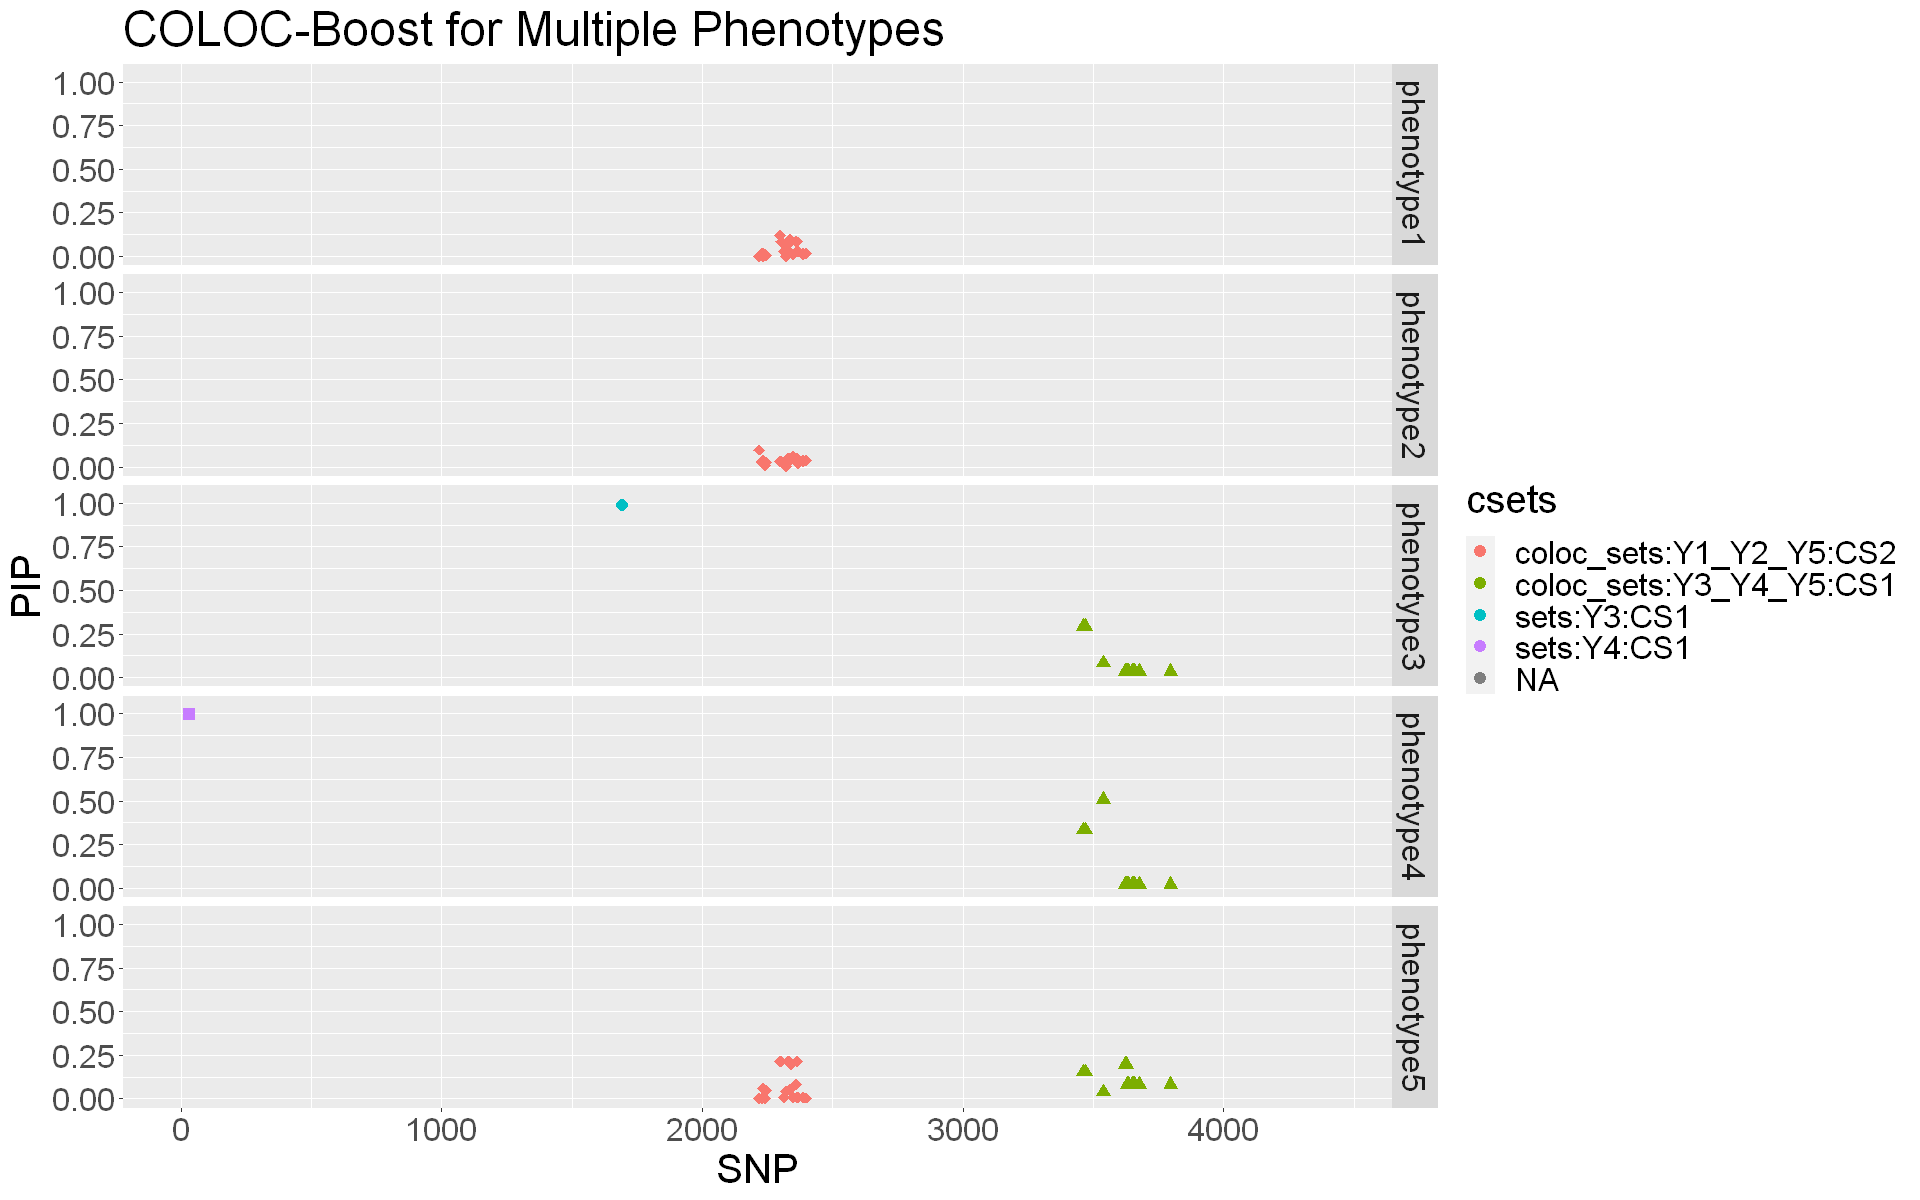

In [7]:
library(ggplot2)
library(tibble)
library(dplyr)
library(tidyr)

ff <- ff_ind
# -- organize results
csets <- list()
name_sets <- names(ff$csets)
for (i in 1:length(Y)){
    cs <- rep(0, ncol(X[[1]]))
    for (j in 1:length(name_sets)){
        pos <- which(ff$change_obj[j,] != 0)
        if (i %in% pos){
            cs[ff$csets[[j]]] <- name_sets[j]
        }
    }
    csets[[i]] <- cs
}

each_tb <- list()
for (i in 1:ff$R){
    temp <- tibble(
        snp = 1:ff$P,
        pip = ff$pip[[i]]
    )
    names(temp)[2] <- paste0(c("pip_"), i)
    each_tb[[i]] <- temp
}

each_phenotype_result <- inner_join(each_tb[[1]], each_tb[[2]], by = "snp") %>%
    inner_join(each_tb[[3]], by = "snp") %>%
    inner_join(each_tb[[4]], by = "snp") %>%
    inner_join(each_tb[[5]], by = "snp")

each_phenotype_tb <- each_phenotype_result %>% 
    pivot_longer(cols = paste0("pip_", 1:length(Y)), names_to = "type", names_prefix="pip_", values_to = "pip") 

cs <- c(t(do.call(cbind, csets)))
COLOC_Boost_tb <- cbind(each_phenotype_tb, csets = cs)
COLOC_Boost_tb$pip[COLOC_Boost_tb$csets==0]<-NA
COLOC_Boost_tb$csets[COLOC_Boost_tb$csets==0]<-NA

# --- plot
options(repr.plot.width=16, repr.plot.height=10)
COLOC_Boost_tb %>% ggplot(aes(x = snp, y = pip, color = csets, shape = csets)) + 
    geom_point(size = 3) + facet_grid(type ~., labeller = as_labeller(c(`1` = "phenotype1", `2` = "phenotype2", `3` = "phenotype3", `4` = "phenotype4", `5` = "phenotype5"))) +
    labs(x = "SNP", y = "PIP", title = "COLOC-Boost for Multiple Phenotypes") +
    theme(text=element_text(size=24)) + ylim(0, 1.05) +
    scale_shape_manual("", values = c(18,17,16,15), guide = "none")